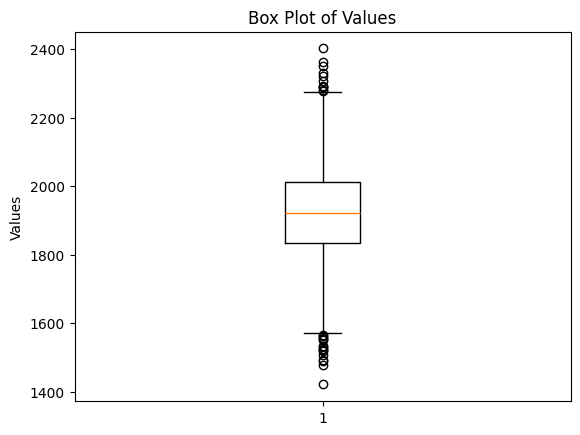

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("phone.csv")

# Contoh DataFrame
df = pd.DataFrame(data)

# Plot box plot
plt.boxplot(df['battery_power'])
plt.title('Box Plot of Values')
plt.ylabel('Values')
plt.show()


In [13]:
import pandas as pd

# Contoh DataFrame
data = pd.read_csv("phone.csv")
df = pd.DataFrame(data)

# Hitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
Q1 = df['clock_speed'].quantile(0.25)
Q3 = df['clock_speed'].quantile(0.75)

# Hitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier
outliers = df[(df['clock_speed'] < lower_bound) | (df['clock_speed'] > upper_bound)]

print("Outliers:")
print(outliers)
print("Jumlah Outliers:", len(outliers))


Outliers:
        no  battery_power  clock_speed       ram    n_cores  use_time  \
145    145    1843.317414     1.981452  4.408617   8.952908  9.591974   
186    186    2075.854544     1.954328  3.308430  13.565442  8.404396   
214    214    1830.277256     0.269403  4.597724  15.958947  8.368460   
290    290    2101.055978     0.256667  5.749797  13.536198  9.293910   
394    394    2079.694803     0.285339  6.313953  11.124502  8.864361   
506    506    1817.799071     1.917131  7.757980  12.537533  7.941563   
936    936    1918.165860     1.974235  6.667345  11.092913  8.991744   
1156  1156    1837.683157     0.063078  4.317201  13.720124  8.413015   
1351  1351    1972.539638     0.086511  5.480426  14.452446  7.163252   
1372  1372    1851.141931     0.287064  1.397486  13.148641  9.340509   
1571  1571    1882.826804     2.145640  5.074190   9.762318  8.251344   
1638  1638    2093.109434     2.056815  9.194076  13.064971  7.456973   
1808  1808    1965.487679     0.188163  7

In [16]:
import pandas as pd
import numpy as np

# Contoh DataFrame
data = pd.read_csv("phone.csv")
df = pd.DataFrame(data)

# Hitung mean dan standar deviasi
mean = df['clock_speed'].mean()
std_dev = df['clock_speed'].std()

# Hitung Z-Score
df['z_score'] = (df['clock_speed'] - mean) / std_dev

# Identifikasi outlier (nilai dengan Z-Score > 3 atau < -3)
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]

print("Outliers:")
print(outliers)
print("Jumlah Outliers:", len(outliers))

Outliers:
        no  battery_power  clock_speed       ram    n_cores  use_time  \
1156  1156    1837.683157     0.063078  4.317201  13.720124  8.413015   
1351  1351    1972.539638     0.086511  5.480426  14.452446  7.163252   
1571  1571    1882.826804     2.145640  5.074190   9.762318  8.251344   
1638  1638    2093.109434     2.056815  9.194076  13.064971  7.456973   
1808  1808    1965.487679     0.188163  7.554211  11.163136  8.957794   
1912  1912    1602.882083     0.178785  4.750867  12.527104  8.324403   

        px_width    px_height     brand        5g grade         price  \
1156  728.650713  1035.677801   sumseng  0.516453     A   8644.681774   
1351  730.385710  1034.472310   sumseng  0.615710     B  10086.720424   
1571  727.782769  1036.231894   sumseng  0.557198     C   8910.849545   
1638  730.111417  1035.921034  largeyou  0.359388     A   9874.535999   
1808  729.769885  1035.960265    oranye  0.113462     A   4909.966445   
1912  729.296711  1035.537248  largeyou 

<Axes: title={'center': 'Scatter Plot Nilai Kimia dan Fisika'}, xlabel='no', ylabel='clock_speed'>

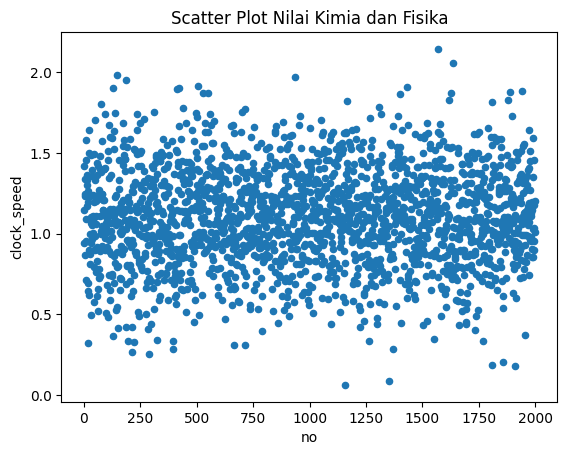

In [18]:
data.plot(kind="scatter", x = "no", y = "clock_speed", title="Scatter Plot Nilai Kimia dan Fisika")